In [1]:
import json
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tqdm.notebook import tqdm

import scrape
import yelp
import constants

sys.path.append("../helpers/")
import helpers

%load_ext autoreload
%autoreload 2

In [2]:
import nord_vpn

from sys import platform

if platform != "darwin":
    pass
    vpn = nord_vpn.NordVPN()
    vpn.connect()
    vpn.disconnect()
    vpn.check_status()

In [3]:
url = scrape.get_michelin_guide_url("new york", "new york", stars="1")
print(url)

https://guide.michelin.com/us/en/new-york-state/new-york/restaurants/1-star-michelin


In [4]:
restaurant_html_list = scrape.get_michelin_guide_restaurant_html_list("new york", "new york", stars="3")
restaurant_html = restaurant_html_list[0]

In [5]:
scrape.MichelinRestaurant(restaurant_html_list[1])

['355', 'USD', '•', 'Contemporary', 'French']


Per Se | 3 Stars | 4.6 Stars (Google Reviews)| 355

In [6]:
# restaurant_html_list = scrape.get_michelin_guide_restaurant_html_list("new york", "new york", stars="1+")
# restaurant_list = scrape.get_convert_restaurant_html_list_to_restaurants(restaurant_html_list)
# restaurant_list = sorted(restaurant_list)

# Michelin Star Restaurants

In [7]:
# restaurant_data = pd.DataFrame([(restaurant.name, restaurant.cost, restaurant.distinction,
#                                  restaurant.google_rating, restaurant) for restaurant in restaurant_list],
#                                columns=["name", "cost", "michelin_stars", "google_rating", "restaurant"])

In [8]:
# restaurant_data = restaurant_data.sort_values(by=["cost", "google_rating"], ascending=[True, False]).reset_index()
# restaurant_data.head(50)

# Bib Gourmand

In [9]:
# bib_gourmand_restaurant_html_list = scrape.get_michelin_guide_restaurant_html_list("new york", "new york", stars="0")
# bib_gourmand_restaurant_list = scrape.get_convert_restaurant_html_list_to_restaurants(bib_gourmand_restaurant_html_list)
# bib_gourmand_restaurant_list = sorted(bib_gourmand_restaurant_list)

In [10]:
# bib_gourmand_restaurant_data = pd.DataFrame([(restaurant.name, restaurant.cost, restaurant.distinction,
#                                  restaurant.google_rating, restaurant) for restaurant in bib_gourmand_restaurant_list],
#                                columns=["name", "cost", "michelin_stars", "google_rating", "restaurant"])

# bib_gourmand_restaurant_data = bib_gourmand_restaura`nt_data.sort_values(by=["cost", "google_rating"],
#                                                                         ascending=[True, False]).reset_index()
# bib_gourmand_restaurant_data.query("google_rating == 4.3").head(50)

# Yelp Data Pulling

In [13]:
overwrite = True

In [14]:
req = yelp.get_restaurants("restaurant", price="4", sort_by="rating")

In [15]:
def add_google_review_data(data):
    """"""
    data["google_review"] = scrape.get_google_rating(data["alias"], anti_dos_delay=.1)
    return data

In [ ]:
data = helpers.cached_function(f"data/yelp_data.pkl", yelp.get_all_restaurants,
                               "restaurant", price="1,2,3,4", sort_by="rating", location="NYC", top=1000,
                               per_price=True, overwrite=False)


Gathering Restaurant Data:   0%|          | 0/3996 [00:00<?, ? restaurants/s]

In [ ]:
restaurant_data = yelp.yelp_data_to_restaurant_df(data)

In [ ]:
restaurant_data

In [ ]:
restaurant_data = helpers.cached_function("data/yelp_data_with_google_reviews.pkl",
                                          add_google_review_data, restaurant_data, overwrite=overwrite)

Fetching Google Reviews:   0%|          | 0/150 [00:00<?, ? Restaurant/s]

Gathering Restaurant Data:  11%|█████████████                                                                                                               | 100/950 [00:17<00:32, 26.29 restaurants/s]

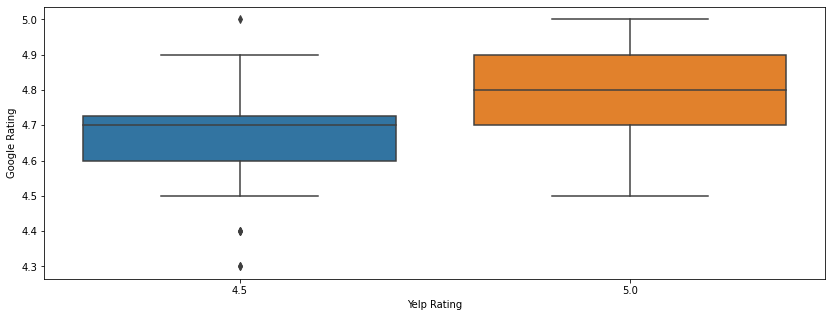

In [16]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.boxplot(data=restaurant_data, x="rating", y="google_review", ax=ax)
helpers.add_plt_labels(ax, x="Yelp Rating", y="Google Rating")

In [18]:
restaurant_data.sort_values("google_review")

,name,review_count,rating,id,alias,categories,address,google_review
95,Tacos El Bronco,190,4.5,9MWmRzKbw6-OR8O1fYa2fw,tacos-el-bronco-brooklyn-7,"Food Trucks, Mexican, Burgers","37th St & 5th Ave, Brooklyn, NY 11232",4.3
113,Semicolon Cafe,84,4.5,-HpCsFpk8PwFpbmEELmg6g,semicolon-cafe-new-york,"Coffee & Tea, Sandwiches","9 Edward M Morgan Pl, New York, NY 10032",4.3
102,Wafels & Dinges,1535,4.5,xJSH3EM1iZtOh4WZti4qjg,wafels-and-dinges-new-york,"Waffles, Food Trucks, Ice Cream & Frozen Yogurt","New York, NY 10011",4.4
19,Royal Grill Halal Food,467,4.5,UtknyDJ_DPut-FKRqs0wpQ,royal-grill-halal-food-new-york-2,"Halal, Food Trucks, Indian","44TH St And 6th Ave, New York, NY 10018",4.4
133,Wafels & Dinges,194,4.5,pUMaj8PvI1--cSB7gMEhXA,wafels-and-dinges-new-york-4,"Food Stands, Waffles, Belgian","Broadway & 66th St, Goesting Cart, New York, N...",4.4
...,...,...,...,...,...,...,...,...
54,The Blue Light Speak Cheesy,85,5.0,RjzLEoOUfLIah2Itfd2HdA,the-blue-light-speak-cheesy-brooklyn-9,"Sandwiches, Breakfast & Brunch, Pop-Up Restaur...","158 Green St, Brooklyn, NY 11222",5.0
81,Zongzi lady,67,5.0,VQ5YGa4L4AT3ugF61hM9qQ,zongzi-lady-new-york,"Street Vendors, Chinese","Chrystie St Grand St, New York, NY 10002",5.0
78,Burmese Bites,88,4.5,YtU1rb_oDHTbYzl-NFglPQ,burmese-bites-elmhurst-2,Burmese,"90-15 Queens Blvd, Elmhurst, NY 11373",5.0
99,Aromas Boutique Bakery,36,5.0,2IpbquaH7zUNnAVw_rLPLQ,aromas-boutique-bakery-new-york,"Bakeries, Custom Cakes","New York, NY 10029",5.0


In [ ]:
t = YelpRestaurant(data["businesses"][0])
vars(t)

In [ ]:
class YelpRestaurant:
    def __init__(self, yelp_data: dict):
        for key, value in yelp_data.items():
            self.__dict__[key] = value
        
        self.google_rating = get_google_rating(f"{self.alias}")

In [ ]:
data["businesses"][3]